# Milestone 1: Groups, Data, Website, and Extraction, Transform, and Load (ETL)

**By JoQuise Bridges**

This write up will walk you through the datasets that I am considering working with and why.

**My Webpage:** [bjoquise's Github](https://github.com/users/bjoquise/projects/1/views/1) 

**My Github Page:** [bjoquise.github.io](https://bjoquise.github.io)

## Setup and Imports

I learned the hard way to remember to install the correct items and packages for this to all work correctly. So saving some time: 



In [1]:
!pip3 install lxml
!pip3 install html5lib

The magic making it all come together:



In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

## Dataset 1 - Stop and Search (Field Interviews)

The first subset that caught my eye was a subset of data collected when individuals are interviewed by NOPD Officers (including individuals stopped for questioning and complainants). I chose this dataset because in my time of growing up on the Westbank, I have heard countless rumors of corruption within NOPD and I feel like this could not be anything to prove that corruption, but could provide statistical evidence on if any car/race/sex plays a role in the amount of stops and the actions after them.

I figured that there could some statistical trends to identify once I began to sift through the data and make different models, such as:

1. What is the distribution of stops by race and gender, and how do the actions taken reflect after that distribution?
   
2. Which vehicle make are most frequently stopped?

3. Does a certain district/zone correlate with the actions taken?


In [3]:
%cd /home/jovyan/notebooks/cmps6790/_labs/

/home/jovyan/notebooks/cmps6790/_labs


In [4]:
!ls

data	Lab01  Lab03  Lab05  Lab08  Lab10  Lab12  old
images	Lab02  Lab04  Lab06  Lab09  Lab11  Lab13  README.md


In [5]:
stops_df = pd.read_csv('data/Stop_and_Search__Field_Interviews__20241003.csv')
stops_df.head()

,FieldInterviewID,NOPD_Item,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,VehicleYear,VehicleMake,...,SubjectWeight,SubjectEyeColor,SubjectHairColor,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,205478,E0161513,05/02/2013 01:56:00 AM,6,M,6th District,FLAGGED DOWN,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,...,150.0,Brown,Black,LA,05/02/2013 02:00:31 AM,NaN,0.0,0.0,NaN,NaN
1,205479,E0149913,05/02/2013 02:00:00 AM,6,I,6th District,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,...,160.0,Brown,Brown,LA,05/02/2013 02:05:28 AM,NaN,0.0,0.0,NaN,NaN
2,205480,E0165313,05/02/2013 02:34:00 AM,6,H,6th District,SUSPECT PERSON,Search Occurred: Yes;Search Types: Pat-down;Ev...,NaN,NaN,...,146.0,Brown,Salt/Pepper,LA,05/02/2013 02:41:32 AM,NaN,0.0,0.0,NaN,NaN
3,205481,E0150813,05/01/2013 11:32:00 PM,4,I,4th District,TRAFFIC VIOLATION,Stop Results: Verbal Warning;Search Occurred: No,NaN,NaN,...,170.0,Brown,Black,NaN,05/02/2013 02:46:54 AM,NaN,0.0,0.0,NaN,NaN
4,205482,E0151913,05/02/2013 03:08:00 AM,6,Q,6th District,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred: No,NaN,NaN,...,130.0,Brown,Black,NaN,05/02/2013 03:20:00 AM,NaN,0.0,0.0,NaN,NaN



**Tidying:** The next few cells will be used to tidy the data since it has so many columns and in order to be classified as tidy, it needs to be long data instead of wide.

For the first adjustment, I can begin to drop several columns that will not be of interest to me when comparing data, such as the `CreatedDateTime`, `LastModifiedDateTime`, etc. As well as the `VehicleStyle` is not important since if we know the make and model, we can infer or easily find the style.

I dropped `OfficerAssignment` because I began to go through the different instances and saw several different forms of districts and abbreviations that were not properly explained within the data, and I felt it was insufficient to keep as a variable.

I will also drop `Longitude` and `Latitude` since it is not as important since so many pieces of data are missing it, but as long as the district is present, it is easier to know where it is.

In [6]:
pstops_df = stops_df.drop(columns=['NOPD_Item', 'OfficerAssignment', 'VehicleStyle', 'SubjectAge', 'SubjectDriverLicState','CreatedDateTime', 'LastModifiedDateTime', 'SubjectEyeColor', 'SubjectHairColor', 'Longitude', 'Latitude', 'Zip', 'BlockAddress'])
pstops_df.head()

,FieldInterviewID,EventDate,District,Zone,StopDescription,ActionsTaken,VehicleYear,VehicleMake,VehicleModel,VehicleColor,SubjectID,SubjectRace,SubjectGender,SubjectHasPhotoID,SubjectHeight,SubjectWeight
0,205478,05/02/2013 01:56:00 AM,6,M,FLAGGED DOWN,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,NaN,NaN,240162.0,BLACK,MALE,Yes,67.0,150.0
1,205479,05/02/2013 02:00:00 AM,6,I,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,NaN,NaN,240163.0,BLACK,MALE,Yes,66.0,160.0
2,205480,05/02/2013 02:34:00 AM,6,H,SUSPECT PERSON,Search Occurred: Yes;Search Types: Pat-down;Ev...,NaN,NaN,NaN,NaN,240164.0,BLACK,MALE,Yes,71.0,146.0
3,205481,05/01/2013 11:32:00 PM,4,I,TRAFFIC VIOLATION,Stop Results: Verbal Warning;Search Occurred: No,NaN,NaN,NaN,RED,240165.0,BLACK,MALE,No,72.0,170.0
4,205482,05/02/2013 03:08:00 AM,6,Q,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred: No,NaN,NaN,NaN,NaN,240166.0,BLACK,FEMALE,No,67.0,130.0


I did want to make sure I convert the `eventdate` for analysis purposes and for the correct data type.

In [7]:
pstops_df['EventDate'] = pd.to_datetime(pstops_df['EventDate'])
pstops_df.head()

,FieldInterviewID,EventDate,District,Zone,StopDescription,ActionsTaken,VehicleYear,VehicleMake,VehicleModel,VehicleColor,SubjectID,SubjectRace,SubjectGender,SubjectHasPhotoID,SubjectHeight,SubjectWeight
0,205478,2013-05-02 01:56:00,6,M,FLAGGED DOWN,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,NaN,NaN,240162.0,BLACK,MALE,Yes,67.0,150.0
1,205479,2013-05-02 02:00:00,6,I,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred:...,NaN,NaN,NaN,NaN,240163.0,BLACK,MALE,Yes,66.0,160.0
2,205480,2013-05-02 02:34:00,6,H,SUSPECT PERSON,Search Occurred: Yes;Search Types: Pat-down;Ev...,NaN,NaN,NaN,NaN,240164.0,BLACK,MALE,Yes,71.0,146.0
3,205481,2013-05-01 23:32:00,4,I,TRAFFIC VIOLATION,Stop Results: Verbal Warning;Search Occurred: No,NaN,NaN,NaN,RED,240165.0,BLACK,MALE,No,72.0,170.0
4,205482,2013-05-02 03:08:00,6,Q,CALL FOR SERVICE,Stop Results: Physical Arrest;Search Occurred: No,NaN,NaN,NaN,NaN,240166.0,BLACK,FEMALE,No,67.0,130.0


**Example Analysis:** I chose to highlight my second question for which vehicles are stopped the most. I could make a bar chart showing the top 10 most often stopped:

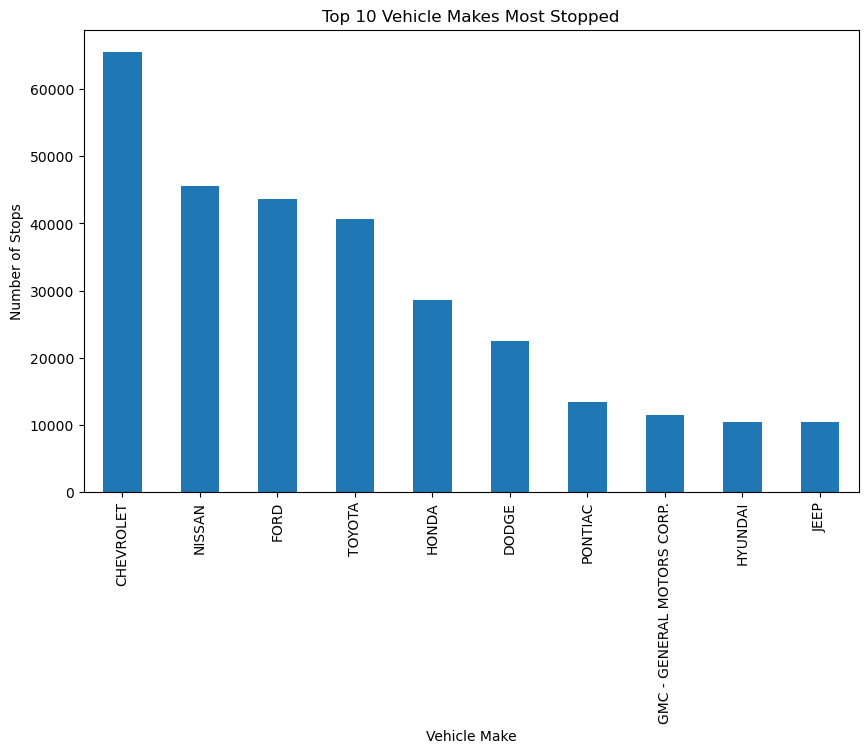

In [8]:
top_makes = pstops_df['VehicleMake'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))

top_makes.plot(kind='bar')
plt.title('Top 10 Vehicle Makes Most Stopped')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Stops')

plt.show()

**Stat I Noticed:** I honestly thought that the `Nissan` make would have been the highest but when you think of those big trucks and Mustangs, it made a lot more sense. It made me want to try further to see if I could get more statistics by plotting for the top 10 Vehicle Makes most stopped per year:

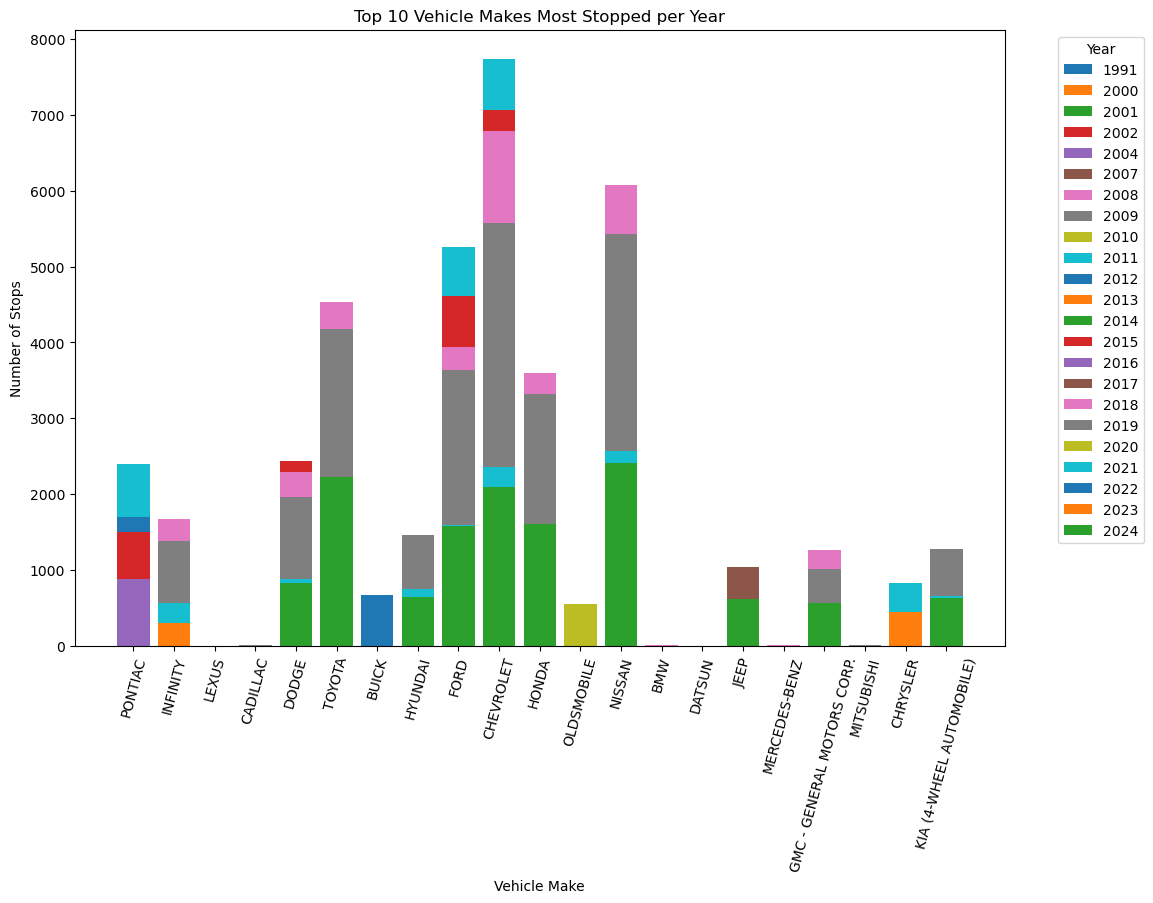

In [22]:
pstops_df['Year'] = pd.to_datetime(pstops_df['EventDate']).dt.year

# Grouped data by 'Year' and 'VehicleMake' and counted the number of stops
year_stops_df = pstops_df.groupby(['Year', 'VehicleMake']).size().reset_index(name='Num_Stops')

# I sorted each year group by the number of stops and take the top 10 for each year
top_vehicles_per_year = year_stops_df.groupby('Year').apply(lambda x: x.nlargest(10, 'Num_Stops')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
# Using Unique from the previous lab
for year in top_vehicles_per_year['Year'].unique():
    top_10_vehicles = top_vehicles_per_year[top_vehicles_per_year['Year'] == year]
    plt.bar(top_10_vehicles['VehicleMake'], top_10_vehicles['Num_Stops'], label=str(year))

plt.title('Top 10 Vehicle Makes Most Stopped per Year')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Stops')
# Needed to tilt the x axis to see all of the vehicle make names
plt.xticks(rotation=75)
# To read the information a bit better, using a legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.show()

Now we can see that 2009 must have been a crazy year for stops, where it opens the possibility of us searching for other data sets to find more potential factors that could play a role in why people with the `Toyota`, `Chevrolet`, and `Nissan` makes were getting stopped pretty frequently.

## Dataset 2 - NBA Shot Selection

This dataset (or set of datasets) made my eyes wide because I felt that the possiblities were endless! It is a collection of NBA regular season shot location data from the 03-04 season to 23-24.

This one required a bit more work to create the data to be presented in a tidy data instance.

Some ideas I had for analysis included:

1. What is the average shooting accuracy across the different zones on the court?

2. What is the distribution of shot distance?

3. How does one player improve throughout their career?*

First, I had to take the separate csv files to combine into one DataFrame:

In [9]:
list_of_frames = []
# Using glob from Lab 6
all_year_shots = glob.glob("data/shots/*.csv")
for datafile in all_year_shots:
# Had to find a way to get the year from all of the files so it can be in the main, big dataframe
    year = int(datafile.split('NBA_')[1].split('_Shots.csv')[0])
    shots_df = pd.read_csv(datafile)
    shots_df["Year"] = year
    list_of_frames.append(shots_df)
    
all_shots_df = pd.concat(list_of_frames, 
                   ignore_index=True)
all_shots_df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Year
0,2009,2008-09,1610612744,Golden State Warriors,201627,Anthony Morrow,G,SG,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,1,2009
1,2009,2008-09,1610612744,Golden State Warriors,101235,Kelenna Azubuike,F,SF,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,9,2009
2,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Center,C,Less Than 8 ft.,-0.0,5.25,0,4,0,25,2009
3,2009,2008-09,1610612739,Cleveland Cavaliers,200789,Daniel Gibson,G,PG,04-15-2009,20801219,...,Center,C,Less Than 8 ft.,-0.2,5.25,0,5,0,4,2009
4,2009,2008-09,1610612756,Phoenix Suns,255,Grant Hill,F,SF,04-15-2009,20801229,...,Left Side,L,8-16 ft.,8.7,7.55,8,4,1,3,2009


### Tidying

As Always, I began to drop the variables I felt were not needed for what I was analyzing.

I chose to keep the `Team_ID`, for the teams that have changed their names, but are essentially the same team...looking at you New Orleans.

I dropped the `SEASON_1` and `SEASON_2` since I already did the work to put the year as a variable.

I dropped `POSITION_GROUP`, `ZONE_ABB`, `ZONE_RANGE`, since I felt they were accounted for within the dataset.

I chose to keep a lot of the variables because of the countless relationships I could compare and make connections out of but as time goes on, I may drop more.

I wanted to convert the data types to make sure that they are correct.

In [10]:
nba_df = all_shots_df.drop(columns=['SEASON_1', 'SEASON_2', 'POSITION_GROUP', 'ZONE_ABB', 'ZONE_RANGE'])
nba_df['GAME_DATE'] = pd.to_datetime(nba_df['GAME_DATE'])

nba_df.head()

,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,...,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Year
0,1610612744,Golden State Warriors,201627,Anthony Morrow,SG,2009-04-15,20801229,PHX,GSW,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,1,2009
1,1610612744,Golden State Warriors,101235,Kelenna Azubuike,SF,2009-04-15,20801229,PHX,GSW,Missed Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,9,2009
2,1610612756,Phoenix Suns,255,Grant Hill,SF,2009-04-15,20801229,PHX,GSW,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.0,5.25,0,4,0,25,2009
3,1610612739,Cleveland Cavaliers,200789,Daniel Gibson,PG,2009-04-15,20801219,CLE,PHI,Made Shot,...,2PT Field Goal,Restricted Area,Center,-0.2,5.25,0,5,0,4,2009
4,1610612756,Phoenix Suns,255,Grant Hill,SF,2009-04-15,20801229,PHX,GSW,Missed Shot,...,2PT Field Goal,Mid-Range,Left Side,8.7,7.55,8,4,1,3,2009


Wanted to verify that the `SHOT_MADE` was a boolean value.
Also, wanted the year to be not the last column read.




In [11]:
nba_df['SHOT_MADE'] = nba_df['SHOT_MADE'].astype(bool)

**Example Analysis:** 

What is the average shooting accuracy across the different zones on the court?


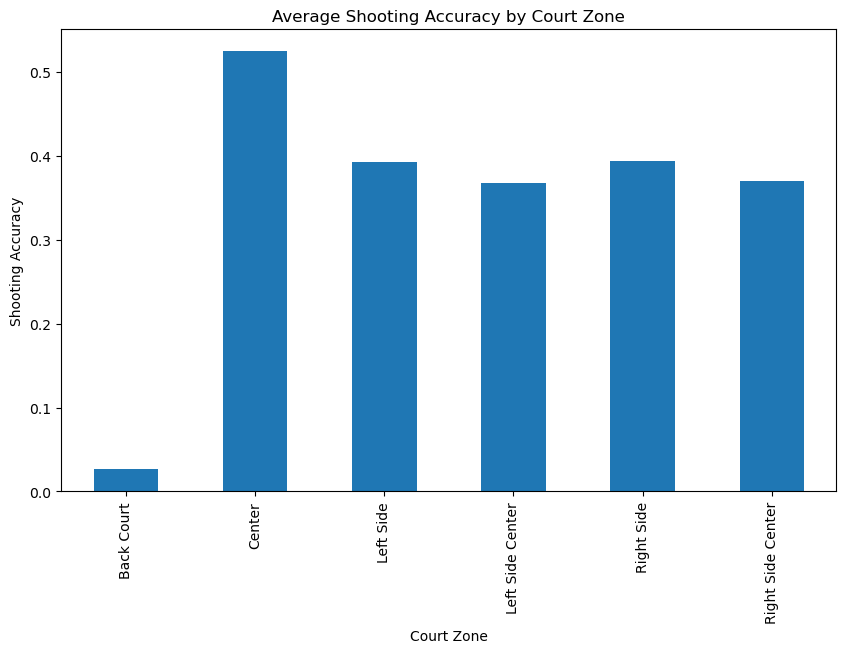

In [12]:
zone_accuracy = nba_df.groupby('ZONE_NAME')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
zone_accuracy.plot(kind='bar')
plt.title('Average Shooting Accuracy by Court Zone')
plt.xlabel('Court Zone')
plt.ylabel('Shooting Accuracy')
plt.show()

**Another Example Analysis:** 

I was not satisfied with that bar chart so I figured I dove a bit deeper into this one since we had more variables at play.

"How does one player improve throughout their career?"

When I initally asked this, I was thinking of tracking a player's makes/misses over their career. But the more I thought about it, what if I wanted to track a player's specific shot over every season.

I used [this](https://www.mathworks.com/help/matlab/ref/plot.html?searchHighlight=line%20graph&s_tid=srchtitle_support_results_1_line%20graph) a bit for help

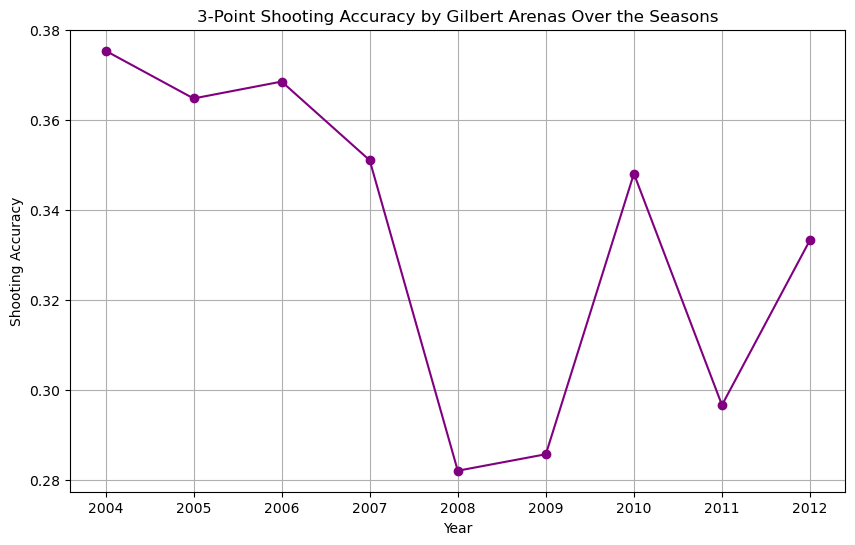

In [18]:
#Filter the data
three_point_shots_df = nba_df[nba_df['SHOT_TYPE'] == '3PT Field Goal']
player_name = 'Gilbert Arenas' 
player_shots_df = three_point_shots_df[three_point_shots_df['PLAYER_NAME'] == player_name]

player_accuracy_by_year = player_shots_df.groupby('Year')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
player_accuracy_by_year.plot(kind='line', marker='o', color='purple')
plt.title(f'3-Point Shooting Accuracy by {player_name} Over the Seasons')
plt.xlabel('Year')
plt.ylabel('Shooting Accuracy')
plt.grid(True)

plt.show()

**Interesting Stat:** Using background knowledge, I know that Gilbert Arenas was drafted in 2001, so a negative part of the data is that I am not getting his entire career, but it is striking that he won NBA Easten Conference Player of the week, from [Wikipedia](https://en.wikipedia.org/wiki/Gilbert_Arenas#Awards_and_honors) only 7 times in his career and that is through the 2004-2006-07 run and the `Shooting Accuracy` shows he was on a great run with the 3-Pointers.

Just for fun, let's see the magificent Stephen Curry:

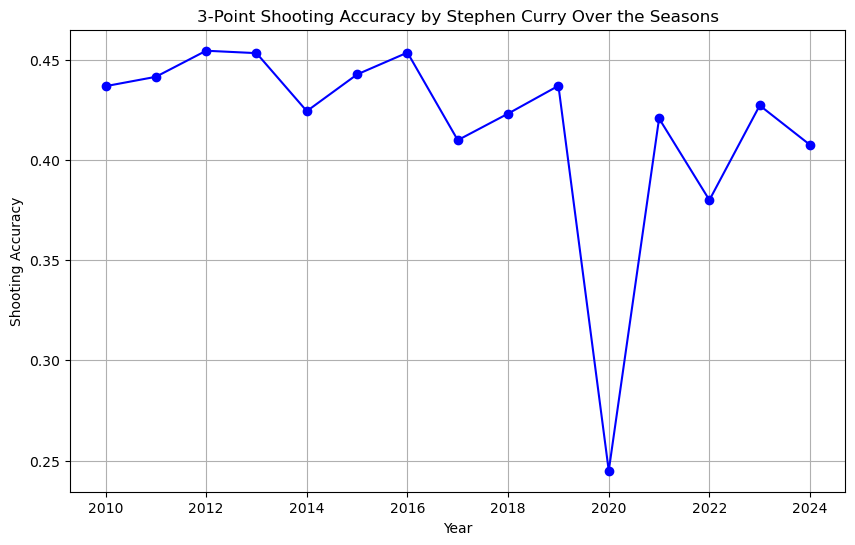

In [24]:
three_point_shots_df = nba_df[nba_df['SHOT_TYPE'] == '3PT Field Goal']
player_name = 'Stephen Curry' 
player_shots_df = three_point_shots_df[three_point_shots_df['PLAYER_NAME'] == player_name]

player_accuracy_by_year = player_shots_df.groupby('Year')['SHOT_MADE'].mean()

plt.figure(figsize=(10,6))
player_accuracy_by_year.plot(kind='line', marker='o', color='blue')
plt.title(f'3-Point Shooting Accuracy by {player_name} Over the Seasons')
plt.xlabel('Year')
plt.ylabel('Shooting Accuracy')
plt.grid(True)

plt.show()

Clearly, the stats show that he had several injuries within 2020. It is a lot of different factors at play as well but he continued to push and still got his accuracy back to his legendary 2016-2018 run.